In [124]:
import json
import os, glob
import pandas as pd
import pandas.io.json as pdjson
import seaborn as sns

In [159]:
data_frames = []

for file in glob.glob("*.json"):
    with open(file) as json_file:
        data = json.load (json_file)
        df = pdjson.json_normalize(data).head(50)
        df['variant'] = file.replace(".json","")
        data_frames.append(df)

df = pd.concat (data_frames)
df.count()

name                               100
command                            100
time_secs                          100
user_time_secs                     100
sys_time_secs                      100
maxrss_kB                          100
ocaml_url                          100
ocaml.version                      100
ocaml.c_compiler                   100
ocaml.architecture                 100
ocaml.word_size                    100
ocaml.system                       100
ocaml.function_sections            100
ocaml.supports_shared_libraries    100
gc.allocated_words                 100
gc.minor_words                     100
gc.promoted_words                  100
gc.major_words                     100
gc.minor_collections               100
gc.major_collections               100
gc.heap_words                      100
gc.heap_chunks                     100
gc.top_heap_words                  100
gc.compactions                     100
variant                            100
dtype: int64

In [160]:
df.head()

,name,command,time_secs,user_time_secs,sys_time_secs,maxrss_kB,ocaml_url,ocaml.version,ocaml.c_compiler,ocaml.architecture,...,gc.minor_words,gc.promoted_words,gc.major_words,gc.minor_collections,gc.major_collections,gc.heap_words,gc.heap_chunks,gc.top_heap_words,gc.compactions,variant
0,kb-no-exc,kb_no_exc.exe,0.440590,0.432102,0.008001,9724,https://github.com/kayceesrk/ocaml/archive/clo...,4.10.0+dev0-2019-04-23,gcc,amd64,...,37350877,4700593,4700593,157,43,430080,7,656896,5,4.10.0+closurerec
1,kb,kb.exe,0.658400,0.653930,0.004011,8808,https://github.com/kayceesrk/ocaml/archive/clo...,4.10.0+dev0-2019-04-23,gcc,amd64,...,90424875,4906420,4906420,369,62,430080,7,565248,6,4.10.0+closurerec
2,lexifi-g2pp,main.exe,14.258371,14.253614,0.003999,7308,https://github.com/kayceesrk/ocaml/archive/clo...,4.10.0+dev0-2019-04-23,gcc,amd64,...,1645745188,180309,180309,6280,7,163328,2,593408,2,4.10.0+closurerec
3,chameneos-lwt,chameneos_redux_lwt.exe 600000,1.105148,1.100622,0.004002,6236,https://github.com/kayceesrk/ocaml/archive/clo...,4.10.0+dev0-2019-04-23,gcc,amd64,...,540723946,820595,820595,2240,356,73728,1,565248,2,4.10.0+closurerec
4,sauvola,contrast.exe example2_small.ppm example2,12.261024,8.675043,3.585065,8152,https://github.com/kayceesrk/ocaml/archive/clo...,4.10.0+dev0-2019-04-23,gcc,amd64,...,2722433042,3577158,49547925,11008,1253,164352,2,594432,2,4.10.0+closurerec


## Time

In [149]:
tdf = df
tdf.filter(items=['name','time_secs','variant'])

,name,time_secs,variant
0,kb-no-exc,0.440590,4.10.0+closurerec
1,kb,0.658400,4.10.0+closurerec
2,lexifi-g2pp,14.258371,4.10.0+closurerec
3,chameneos-lwt,1.105148,4.10.0+closurerec
4,sauvola,12.261024,4.10.0+closurerec
...,...,...,...
45,pervasives_bench.pervasives_equal_strings.2000...,2.318377,4.10.0+trunk
46,big_array_bench.big_array_int32_rev.1024.50000,1.541707,4.10.0+trunk
47,hashtbl_bench.hashtbl_iter.200000,2.430197,4.10.0+trunk
48,str_bench.str_search_forward.1000000,0.278141,4.10.0+trunk


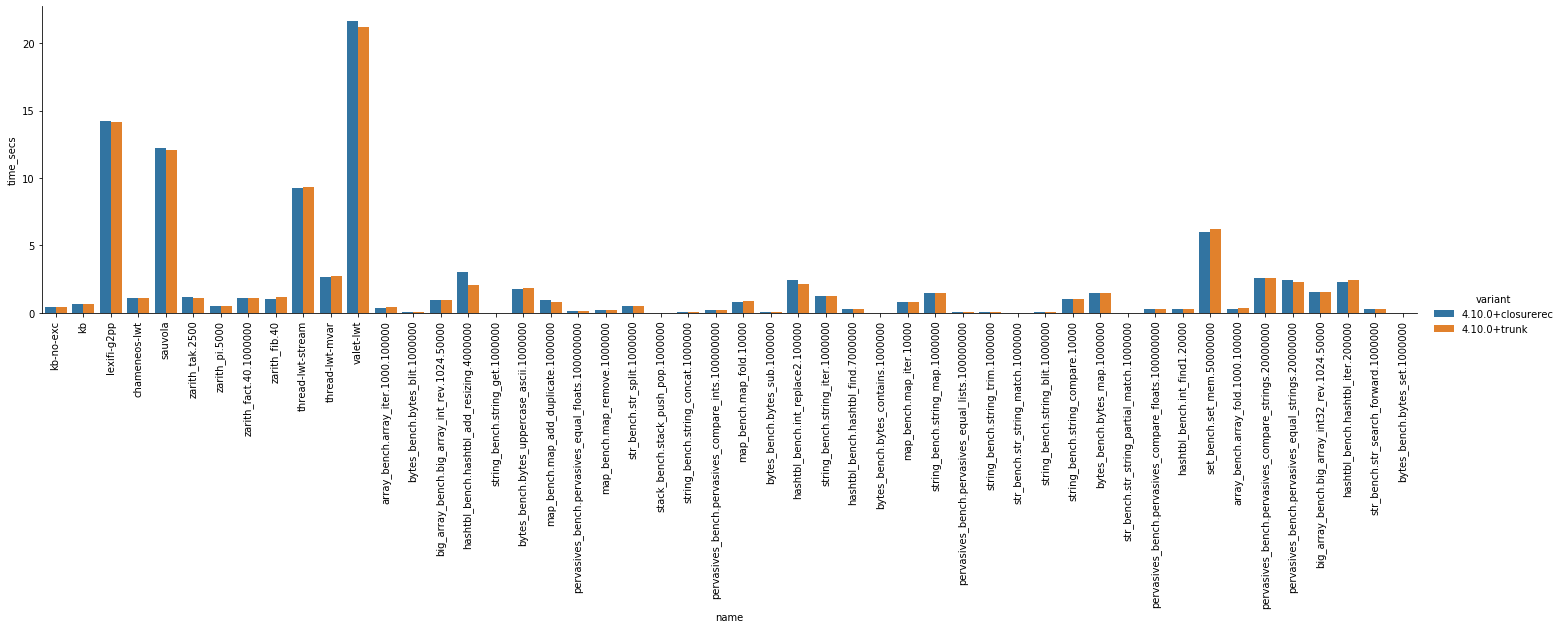

In [153]:
g = sns.catplot (x='name', y='time_secs', hue='variant', data = tdf, kind ='bar', aspect=4)
g.set_xticklabels(rotation=90)

## Major words

In [168]:
tdf = df
tdf.filter(items=['name','gc.major_words','variant'])

,name,gc.major_words,variant
0,kb-no-exc,4700593,4.10.0+closurerec
1,kb,4906420,4.10.0+closurerec
2,lexifi-g2pp,180309,4.10.0+closurerec
3,chameneos-lwt,820595,4.10.0+closurerec
4,sauvola,49547925,4.10.0+closurerec
...,...,...,...
45,pervasives_bench.pervasives_equal_strings.2000...,71,4.10.0+trunk
46,big_array_bench.big_array_int32_rev.1024.50000,1243,4.10.0+trunk
47,hashtbl_bench.hashtbl_iter.200000,9419,4.10.0+trunk
48,str_bench.str_search_forward.1000000,354,4.10.0+trunk


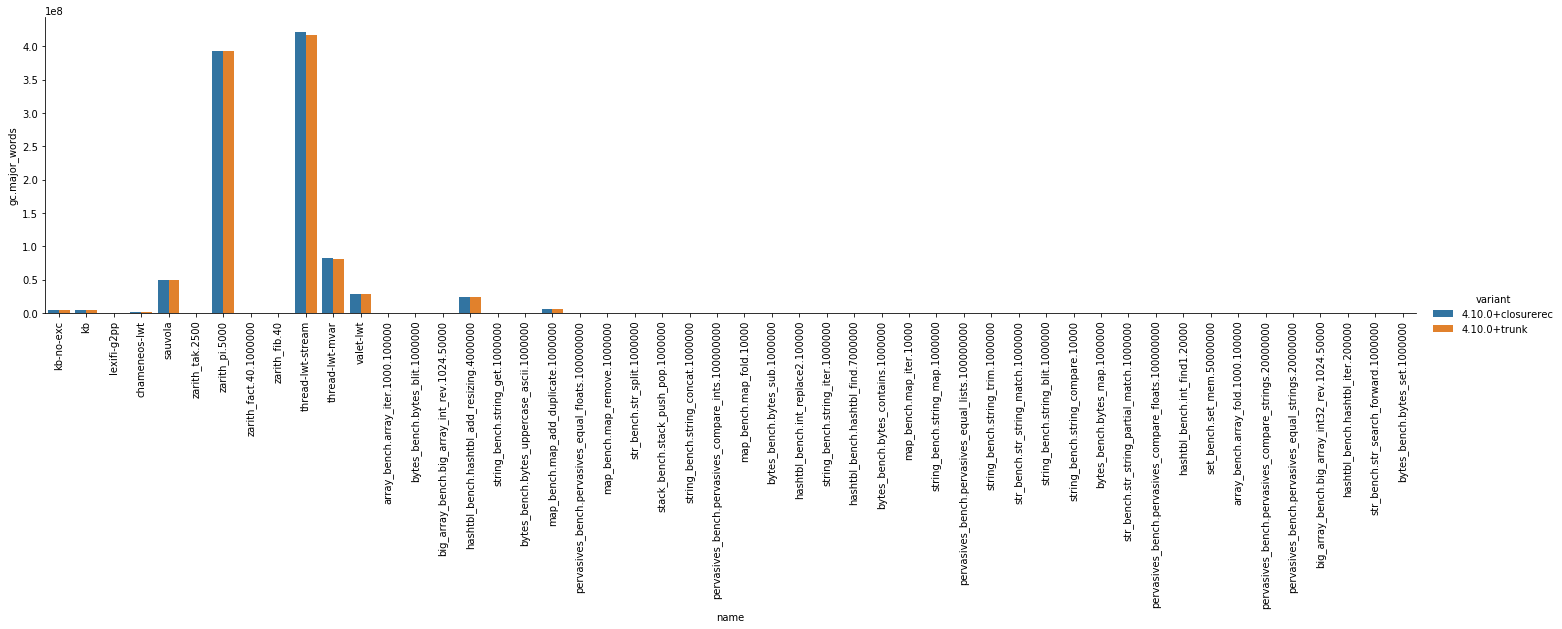

In [162]:
g = sns.catplot (x='name', y='gc.major_words', hue='variant', data = tdf, kind ='bar', aspect=4)
g.set_xticklabels(rotation=90)